In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import plotly.express as px

In [4]:
connection=mysql.connector.connect(
    user='root',
    password='Kavi@1602',
    host='localhost',
    database='ecommerce'
)

In [5]:
cursor=connection.cursor()

In [7]:
cursor.execute('select * from  Products')
Product_data=pd.DataFrame(cursor.fetchall(),columns=[desc[0] for desc in cursor.description])

In [8]:
cursor.execute('select * from  Customers')
Customers_data=pd.DataFrame(cursor.fetchall(),columns=[desc[0] for desc in cursor.description])

In [9]:
cursor.execute('select * from  Orders')
Orders_data=pd.DataFrame(cursor.fetchall(),columns=[desc[0] for desc in cursor.description])

In [17]:
cursor.execute('select * from  OrderDetails')
OrderDetails_data=pd.DataFrame(cursor.fetchall(),columns=[desc[0] for desc in cursor.description])

In [11]:
print(Product_data.head())

   ProductID        Name                                        Description  \
0          1      Laptop  15.6-inch laptop with high-performance specifi...   
1          2  Smartphone         6.4-inch smartphone with dual camera setup   
2          3  Headphones  Wireless headphones with noise cancellation fe...   
3          4     T-shirt                 Cotton t-shirt with printed design   
4          5       Jeans              Slim-fit jeans made from denim fabric   

    Price     Category         Brand  QuantityInStock  
0  999.99  Electronics  ExampleBrand               50  
1  699.99  Electronics  ExampleBrand              100  
2  149.99  Electronics  ExampleBrand              200  
3   19.99      Apparel  ExampleBrand              300  
4   39.99      Apparel  ExampleBrand              150  


In [13]:
print(Customers_data.head())

   CustomerID             Name                  Email  \
0           1         John Doe    johndoe@example.com   
1           2       Jane Smith  janesmith@example.com   
2           3  Michael Johnson    michael@example.com   
3           4      Emily Brown      emily@example.com   
4           5     David Wilson      david@example.com   

                             Address     Phone  
0    123 Main Street, Cityville, USA  555-1234  
1    456 Elm Street, Townsville, USA  555-5678  
2    789 Oak Street, Villageton, USA  555-9012  
3  101 Pine Street, Hamletville, USA  555-3456  
4   234 Maple Street, Burgville, USA  555-7890  


In [14]:
print(Orders_data.head())

   OrderID  CustomerID   OrderDate TotalAmount  \
0        1           1  2024-04-01       99.99   
1        2           2  2024-04-02      199.99   
2        3           3  2024-04-03      299.99   
3        4           4  2024-04-04      149.99   
4        5           5  2024-04-05       49.99   

                     ShippingAddress PaymentMethod  
0    123 Main Street, Cityville, USA   Credit Card  
1    456 Elm Street, Townsville, USA        PayPal  
2    789 Oak Street, Villageton, USA   Credit Card  
3  101 Pine Street, Hamletville, USA   Credit Card  
4   234 Maple Street, Burgville, USA        PayPal  


In [18]:
print(OrderDetails_data.head())

   OrderDetailID  OrderID  ProductID  Quantity UnitPrice
0              1        1          1         2    499.99
1              2        1          3         1    149.99
2              3        2          2         1   1499.99
3              4        2          5         3    209.97
4              5        3          4         1     29.99


In [30]:
print(Product_data.columns)

Index(['ProductID', 'Name', 'Description', 'Price', 'Category', 'Brand',
       'QuantityInStock'],
      dtype='object')


In [35]:
OrderDetails_data.columns

Index(['OrderDetailID', 'OrderID', 'ProductID', 'Quantity', 'UnitPrice'], dtype='object')

In [37]:
Orders_data.columns

Index(['OrderID', 'CustomerID', 'OrderDate', 'TotalAmount', 'ShippingAddress',
       'PaymentMethod'],
      dtype='object')

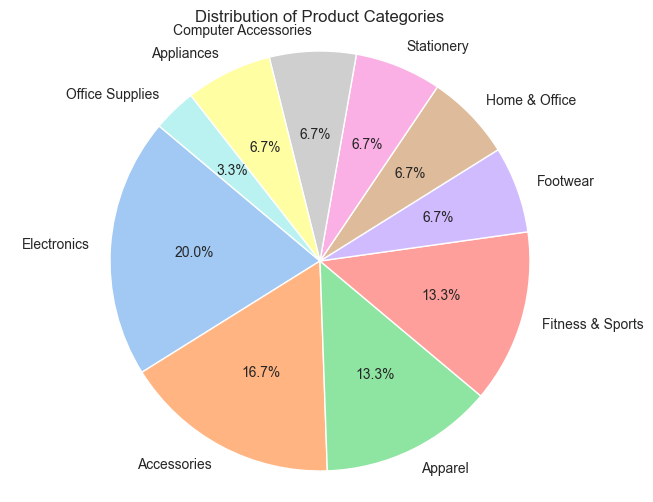

In [40]:
category_counts = Product_data['Category'].value_counts()

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.set_palette("pastel")
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Product Categories')
plt.axis('equal')
plt.show()

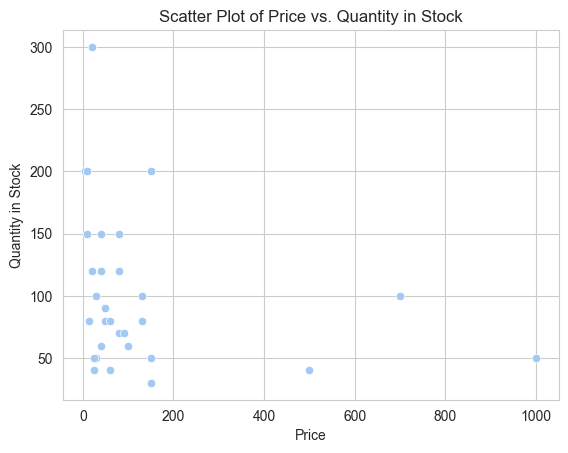

In [42]:
sns.scatterplot(data=Product_data, x='Price', y='QuantityInStock')
plt.title('Scatter Plot of Price vs. Quantity in Stock')
plt.xlabel('Price')
plt.ylabel('Quantity in Stock')
plt.show()

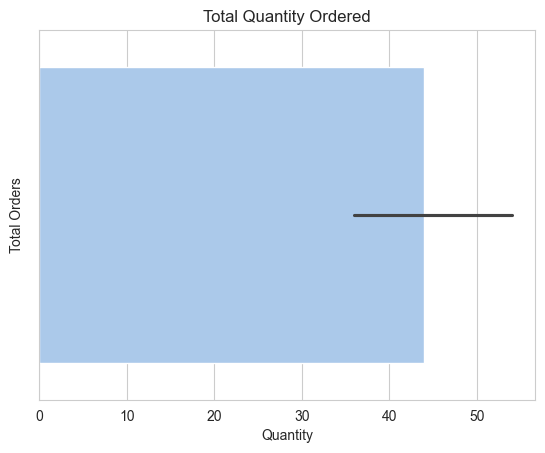

In [52]:
sns.barplot(data=OrderDetails_data, x='Quantity', estimator=sum)
plt.title('Total Quantity Ordered')
plt.xlabel('Quantity')
plt.ylabel('Total Orders')
plt.show()

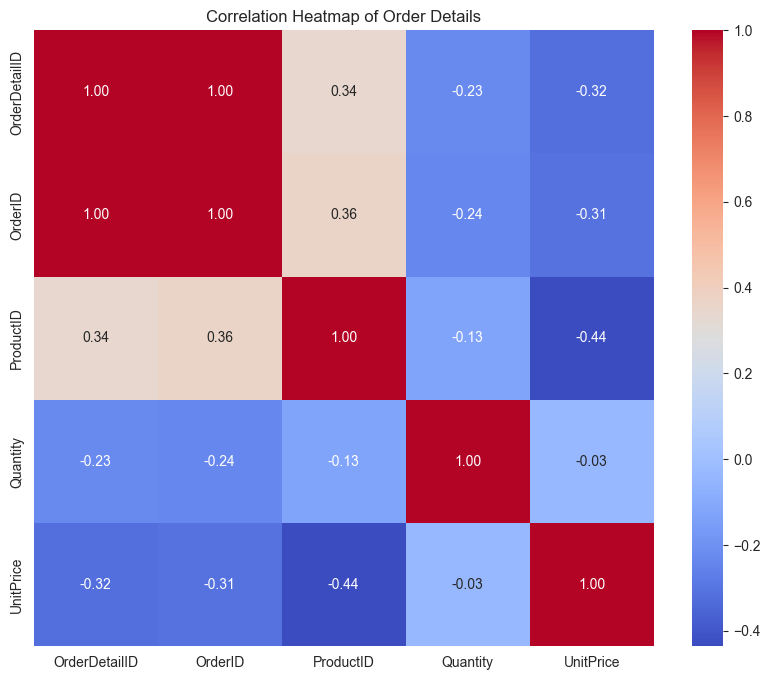

In [51]:
numeric_columns = ['OrderDetailID', 'OrderID', 'ProductID', 'Quantity', 'UnitPrice']
correlation_matrix = OrderDetails_data[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Order Details')
plt.show()

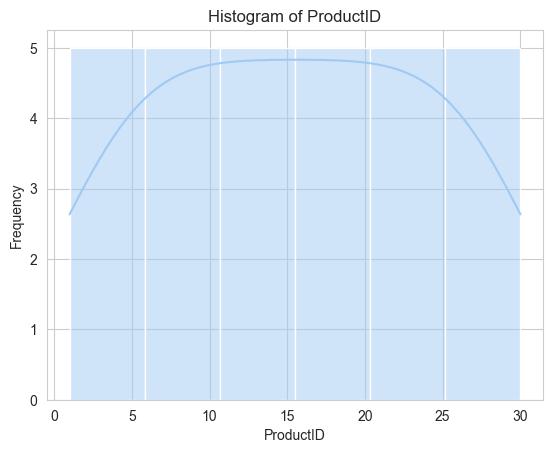

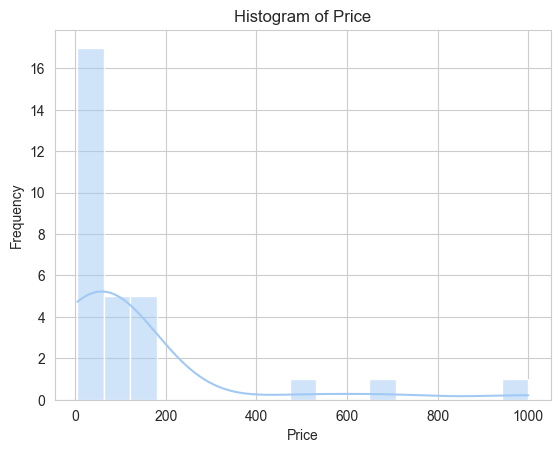

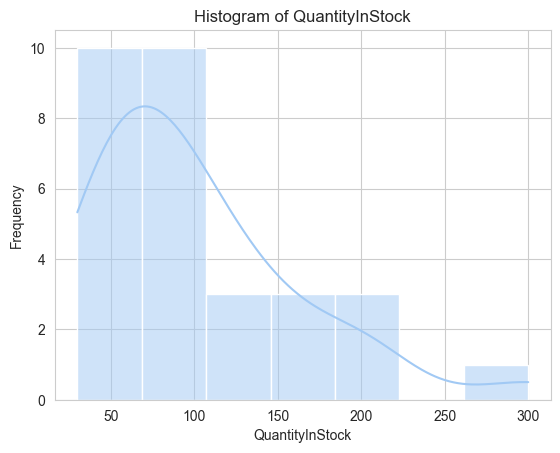

In [57]:
columns_for_histogram = ['ProductID', 'Price', 'QuantityInStock']

# Loop through the selected columns and create histograms
for column in columns_for_histogram:
    sns.histplot(Product_data[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()